<a href="https://colab.research.google.com/github/VivaldiX96/Tensorflow-FoodVision/blob/main/01_neural_network_regression_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.15.0


### Creating data to view and fit

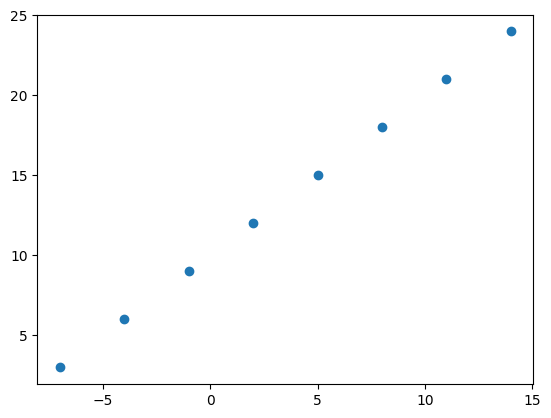

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(X, y);

In [ ]:
y == X+10

array([ True,  True,  True,  True,  True,  True,  True,  True])

### Input and output shapes

In [ ]:


# Example input and output shapes of a regression model
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [ ]:

# Take a single example of X
input_shape = X[0].shape

# Take a single example of y
output_shape = y[0].shape

input_shape, output_shape # these are both scalars (no shape)

((), ())

In [ ]:
# Let's take a look at the single examples invidually
X[0], y[0]

(-7.0, 3.0)

In [ ]:
# Turn our numpy arrays into tensors
X = tf.constant(X)
y = tf.constant(y)
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [ ]:
# Take  X - now as tf constant
input_shape = X[0].shape

# Take  y  - now as tf constant
output_shape = y[0].shape

input_shape, output_shape

(TensorShape([]), TensorShape([]))

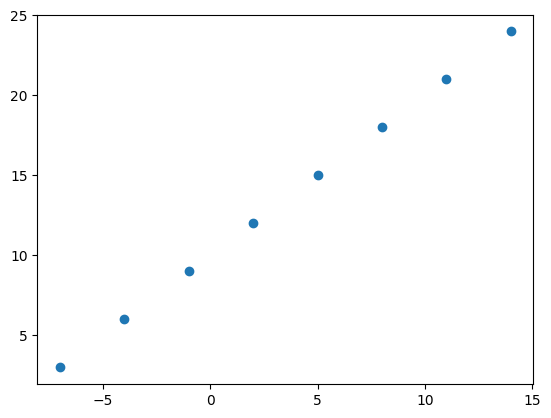

In [ ]:
# Visualize it
plt.scatter(X, y);

### Steps  in modeling with Tensorflow
**Creating a model** - piece together the layers of a neural network yourself (using the Functional or Sequential API) or import a previously built model (known as transfer learning).
**Compiling a model** - defining how a models performance should be measured (loss/metrics) as well as defining how it should improve (optimizer).
**Fitting a model** - letting the model try to find patterns in the data (how does X get to y).

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create a model using the Sequential API
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(loss=tf.keras.losses.mae, # mae is short for mean absolute error
              optimizer=tf.keras.optimizers.SGD(), # SGD is short for stochastic gradient descent
              metrics=["mae"])

# Fit the model
# model.fit(X, y, epochs=5) # this will break with TensorFlow 2.7.0+
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)

Epoch 1/5
1/1 [==============================] - 1s 503ms/step - loss: 8.4631 - mae: 8.4631
Epoch 2/5
1/1 [==============================] - 0s 12ms/step - loss: 8.3306 - mae: 8.3306
Epoch 3/5
1/1 [==============================] - 0s 13ms/step - loss: 8.1981 - mae: 8.1981
Epoch 4/5
1/1 [==============================] - 0s 12ms/step - loss: 8.0656 - mae: 8.0656
Epoch 5/5
1/1 [==============================] - 0s 11ms/step - loss: 7.9331 - mae: 7.9331


In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create a model using the Sequential API
model = tf.keras.Sequential([
  tf.keras.layers.Dense(50, activation = None),
  tf.keras.layers.Dense(50, activation = None),
  tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(loss=tf.keras.losses.mae, # mae is short for mean absolute error
              #optimizer=tf.keras.optimizers.Adam(lr=0.0001),
              optimizer=tf.keras.optimizers.SGD(), # SGD is short for stochastic gradient descent
              metrics=["mae"])

# Fit the model
# model.fit(X, y, epochs=5) # this will break with TensorFlow 2.7.0+
model.fit(tf.expand_dims(X, axis=-1), y, epochs=70)

Epoch 1/70
1/1 [==============================] - 4s 4s/step - loss: 14.1049 - mae: 14.1049
Epoch 2/70
1/1 [==============================] - 0s 29ms/step - loss: 13.3434 - mae: 13.3434
Epoch 3/70
1/1 [==============================] - 0s 18ms/step - loss: 12.5972 - mae: 12.5972
Epoch 4/70
1/1 [==============================] - 0s 33ms/step - loss: 11.8462 - mae: 11.8462
Epoch 5/70
1/1 [==============================] - 0s 21ms/step - loss: 11.0702 - mae: 11.0702
Epoch 6/70
1/1 [==============================] - 0s 34ms/step - loss: 10.2484 - mae: 10.2484
Epoch 7/70
1/1 [==============================] - 0s 32ms/step - loss: 9.3575 - mae: 9.3575
Epoch 8/70
1/1 [==============================] - 0s 22ms/step - loss: 8.3711 - mae: 8.3711
Epoch 9/70
1/1 [==============================] - 0s 32ms/step - loss: 7.2574 - mae: 7.2574
Epoch 10/70
1/1 [==============================] - 0s 32ms/step - loss: 7.5521 - mae: 7.5521
Epoch 11/70
1/1 [==============================] - 0s 35ms/step - los

In [ ]:
model.predict([0.0])

1/1 [==============================] - 0s 292ms/step


array([[4.2156596]], dtype=float32)

In [ ]:
# Make a bigger dataset
X = np.arange(-100, 100, 4)
X

array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96])

In [ ]:
# Make labels for the dataset (adhering to the same pattern as before)
y = np.arange(-90, 110, 4)
y

array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106])

In [ ]:
# Same result as above
y = X + 10
y

array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106])

###Split data into training/test set

In [ ]:
# Check how many samples we have
len(X)

50

In [ ]:
# Split data into train and test sets
X_train = X[:40] # first 40 examples (80% of data)
y_train = y[:40]

X_test = X[40:] # last 10 examples (20% of data)
y_test = y[40:]

len(X_train), len(X_test)

(40, 10)

###Visualizing the data

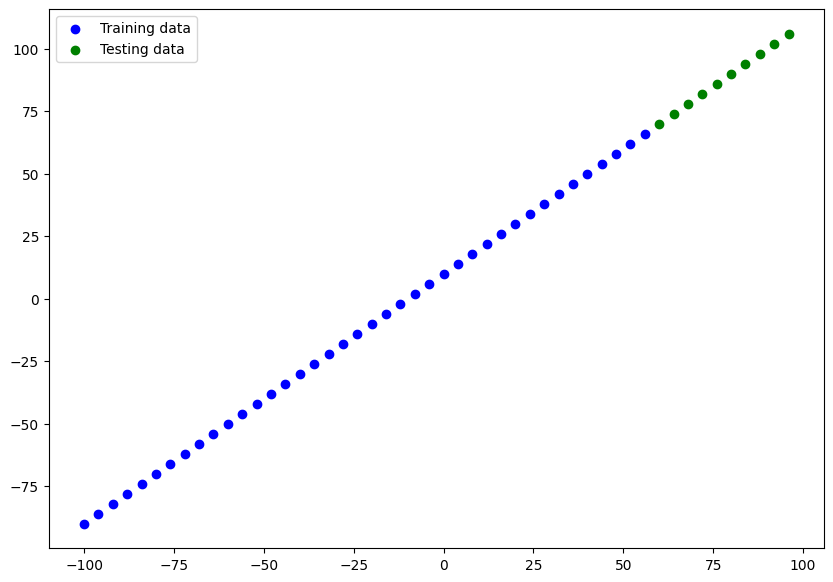

In [ ]:
plt.figure(figsize=(10, 7))
# Plot training data in blue
plt.scatter(X_train, y_train, c='b', label='Training data')
# Plot test data in green
plt.scatter(X_test, y_test, c='g', label='Testing data')
# Show the legend
plt.legend();

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create a model (same as above)
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# Compile model (same as above)
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["mae"])

# Fit model (same as above)
#model.fit(X_train, y_train, epochs=100) # commented out on purpose (not fitting it just yet)

###Visualizing the model

In [ ]:

# Set random seed
tf.random.set_seed(42)

# Create a model (same as above)
model = tf.keras.Sequential([
  tf.keras.layers.Dense(10, input_shape=[1],  name="input_layer"), # define the input_shape to our model
  tf.keras.layers.Dense(1, name="output_layer")

], name="One_of_the_models")

# Compile model (same as above)
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=["mae"])

# Fit model (same as above)
model.fit(X_train, y_train, epochs=100) #

Epoch 1/100
2/2 [==============================] - 1s 15ms/step - loss: 41.3247 - mae: 41.3247
Epoch 2/100
2/2 [==============================] - 0s 10ms/step - loss: 34.6003 - mae: 34.6003
Epoch 3/100
2/2 [==============================] - 0s 10ms/step - loss: 28.2198 - mae: 28.2198
Epoch 4/100
2/2 [==============================] - 0s 12ms/step - loss: 21.7911 - mae: 21.7911
Epoch 5/100
2/2 [==============================] - 0s 10ms/step - loss: 15.7741 - mae: 15.7741
Epoch 6/100
2/2 [==============================] - 0s 11ms/step - loss: 10.4277 - mae: 10.4277
Epoch 7/100
2/2 [==============================] - 0s 9ms/step - loss: 8.2280 - mae: 8.2280
Epoch 8/100
2/2 [==============================] - 0s 10ms/step - loss: 10.5145 - mae: 10.5145
Epoch 9/100
2/2 [==============================] - 0s 11ms/step - loss: 11.2255 - mae: 11.2255
Epoch 10/100
2/2 [==============================] - 0s 11ms/step - loss: 11.4177 - mae: 11.4177
Epoch 11/100
2/2 [==============================] - 

In [ ]:
# This will work after specifying the input shape
model.summary()

Model: "One_of_the_models"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
from tensorflow.keras.utils import plot_model

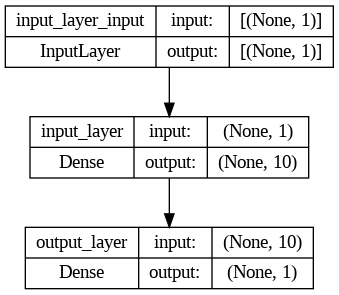

In [ ]:
plot_model(model=model, show_shapes=True)

###Visualizing the predictions

In [ ]:

# Make predictions
y_pred = model.predict(X_test)

1/1 [==============================] - 0s 23ms/step


In [ ]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_pred):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))
  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", label="Training data")
  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", label="Testing data")
  # Plot the predictions in red (predictions were made on the test data)
  plt.scatter(test_data, predictions, c="r", label="Predictions")
  # Show the legend
  plt.legend();

NameError: name 'X_train' is not defined

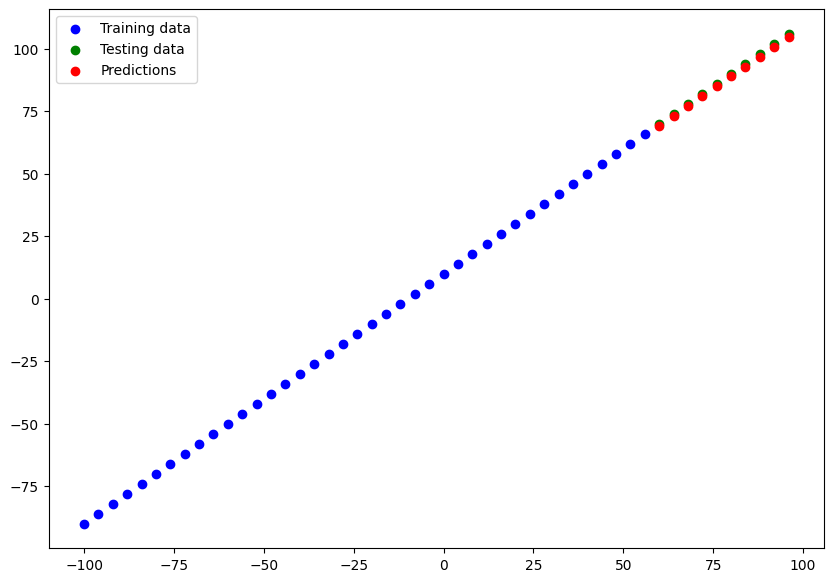

In [ ]:
plot_predictions()

In [ ]:
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 35ms/step - loss: 1.0204 - mae: 1.0204


[1.0204079151153564, 1.0204079151153564]

In [ ]:
mae = tf.metrics.mean_absolute_error(y_true=y_test, y_pred=y_pred)
#tf.metrics.MeanAbsoluteError(y_true=y_test, y_pred=y_preds)

mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([18.813454, 15.487555, 12.94326 , 11.18057 , 10.199483, 10.      ,
       10.582121, 11.945847, 14.091181, 17.018108], dtype=float32)>

In [ ]:
tf.constant(y_pred)

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[ 69.18655 ],
       [ 73.14056 ],
       [ 77.09457 ],
       [ 81.04858 ],
       [ 85.00259 ],
       [ 88.9566  ],
       [ 92.91061 ],
       [ 96.86462 ],
       [100.818634],
       [104.77264 ]], dtype=float32)>

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 69.18655 ,  73.14056 ,  77.09457 ,  81.04858 ,  85.00259 ,
        88.9566  ,  92.91061 ,  96.86462 , 100.818634, 104.77264 ],
      dtype=float32)>

In [ ]:
mae = tf.metrics.mean_absolute_error(y_true=y_test, y_pred=tf.squeeze(y_pred))

mae

<tf.Tensor: shape=(), dtype=float32, numpy=1.0204079>

In [ ]:
mse = tf.metrics.mean_squared_error(y_true=y_test, y_pred=tf.squeeze(y_pred))

mse

<tf.Tensor: shape=(), dtype=float32, numpy=1.0586814>

In [ ]:
def mae(y_test,y_pred):
  """
  Calculuates mean absolute error between y_test and y_preds.
  """
  return tf.metrics.mean_absolute_error(y_test,
                                         tf.squeeze(y_pred))

def mse(y_test, y_pred):
  """
  Calculates mean squared error between y_test and y_preds.
  """
  return tf.metrics.mean_squared_error(y_test,
                                        tf.squeeze(y_pred))


##Building Model_1

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Replicate original model
model_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# Compile the model
model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae'])

# Fit the model
model_1.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 1s 15ms/step - loss: 85.4640 - mae: 85.4640
Epoch 2/100
2/2 [==============================] - 0s 10ms/step - loss: 50.0085 - mae: 50.0085
Epoch 3/100
2/2 [==============================] - 0s 11ms/step - loss: 15.1369 - mae: 15.1369
Epoch 4/100
2/2 [==============================] - 0s 9ms/step - loss: 8.2244 - mae: 8.2244
Epoch 5/100
2/2 [==============================] - 0s 10ms/step - loss: 10.6548 - mae: 10.6548
Epoch 6/100
2/2 [==============================] - 0s 10ms/step - loss: 9.8627 - mae: 9.8627
Epoch 7/100
2/2 [==============================] - 0s 11ms/step - loss: 8.9353 - mae: 8.9353
Epoch 8/100
2/2 [==============================] - 0s 11ms/step - loss: 9.0987 - mae: 9.0987
Epoch 9/100
2/2 [==============================] - 0s 7ms/step - loss: 19.6186 - mae: 19.6186
Epoch 10/100
2/2 [==============================] - 0s 7ms/step - loss: 10.6142 - mae: 10.6142
Epoch 11/100
2/2 [==============================] - 0s 8ms/s

1/1 [==============================] - 0s 143ms/step


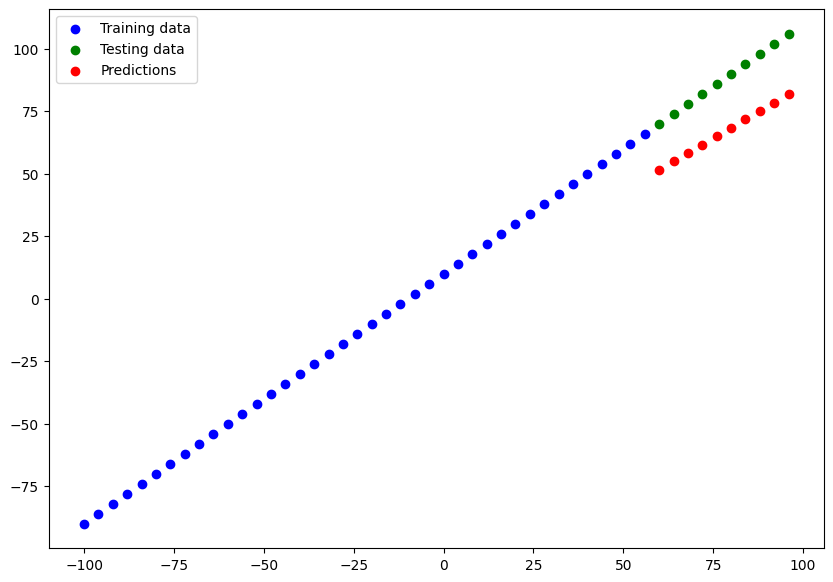

In [ ]:

# Make and plot predictions for model_1
y_preds_1 = model_1.predict(X_test)
plot_predictions(predictions=y_preds_1)

In [ ]:
#Creating model_1 evaluation metrics
mae_1 = mae(y_test,y_preds_1)
mse_1 = mse(y_test, y_preds_1)
mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=21.291428>,
 <tf.Tensor: shape=(), dtype=float32, numpy=456.7596>)

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Replicate original model
model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(3),
  tf.keras.layers.Dense(1)
])

# Compile the model
model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mse'])

# Fit the model
model_2.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 1s 14ms/step - loss: 58.9396 - mse: 4992.0674
Epoch 2/100
2/2 [==============================] - 0s 12ms/step - loss: 10.7982 - mse: 186.6268
Epoch 3/100
2/2 [==============================] - 0s 14ms/step - loss: 27.6962 - mse: 1101.1967
Epoch 4/100
2/2 [==============================] - 0s 9ms/step - loss: 20.9154 - mse: 626.1686
Epoch 5/100
2/2 [==============================] - 0s 10ms/step - loss: 13.9745 - mse: 237.7546
Epoch 6/100
2/2 [==============================] - 0s 11ms/step - loss: 11.1735 - mse: 139.2694
Epoch 7/100
2/2 [==============================] - 0s 9ms/step - loss: 12.1568 - mse: 188.0385
Epoch 8/100
2/2 [==============================] - 0s 9ms/step - loss: 10.8603 - mse: 135.0843
Epoch 9/100
2/2 [==============================] - 0s 10ms/step - loss: 37.6656 - mse: 2189.3459
Epoch 10/100
2/2 [==============================] - 0s 8ms/step - loss: 25.3043 - mse: 898.4745
Epoch 11/100
2/2 [======================

1/1 [==============================] - 0s 55ms/step


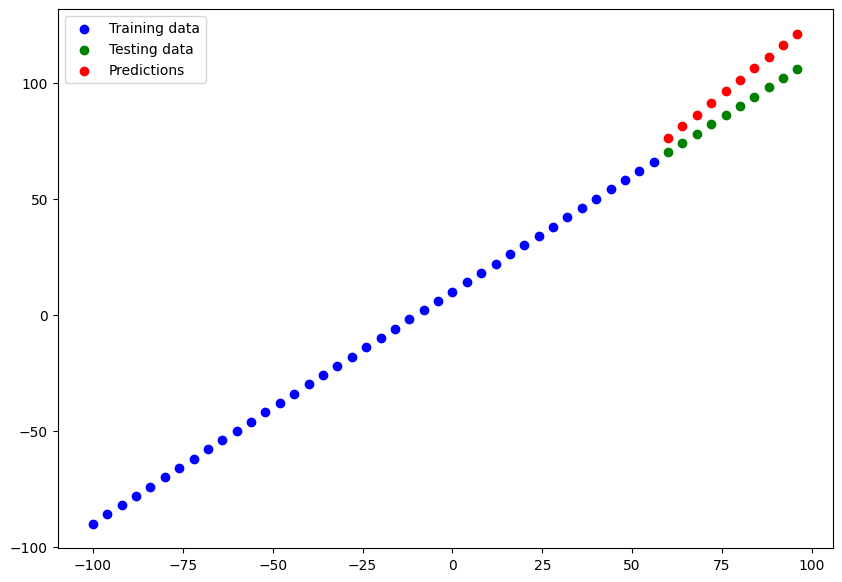

In [ ]:

# Make and plot predictions for model_2
y_preds_2 = model_2.predict(X_test)
plot_predictions(predictions=y_preds_2)

In [ ]:

# Calculate model_2 metrics
mae_2 = mae(y_test, y_preds_2).numpy()
mse_2 = mse(y_test, y_preds_2).numpy()
mae_2, mse_2

(10.695365, 122.194984)

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Replicate original model
model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(3),
  tf.keras.layers.Dense(1)
])

# Compile the model
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mse'])

# Fit the model
model_3.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=500)

Epoch 1/500
2/2 [==============================] - 0s 16ms/step - loss: 102.1761 - mse: 16052.4561
Epoch 2/500
2/2 [==============================] - 0s 7ms/step - loss: 31.1365 - mse: 1488.4451
Epoch 3/500
2/2 [==============================] - 0s 8ms/step - loss: 21.6794 - mse: 695.1273
Epoch 4/500
2/2 [==============================] - 0s 7ms/step - loss: 13.8902 - mse: 261.8687
Epoch 5/500
2/2 [==============================] - 0s 8ms/step - loss: 18.9447 - mse: 487.2840
Epoch 6/500
2/2 [==============================] - 0s 8ms/step - loss: 9.5068 - mse: 125.0210
Epoch 7/500
2/2 [==============================] - 0s 9ms/step - loss: 10.4995 - mse: 141.7788
Epoch 8/500
2/2 [==============================] - 0s 7ms/step - loss: 12.1421 - mse: 203.3277
Epoch 9/500
2/2 [==============================] - 0s 8ms/step - loss: 38.0689 - mse: 2239.0222
Epoch 10/500
2/2 [==============================] - 0s 7ms/step - loss: 25.6445 - mse: 923.5038
Epoch 11/500
2/2 [==========================

1/1 [==============================] - 0s 63ms/step


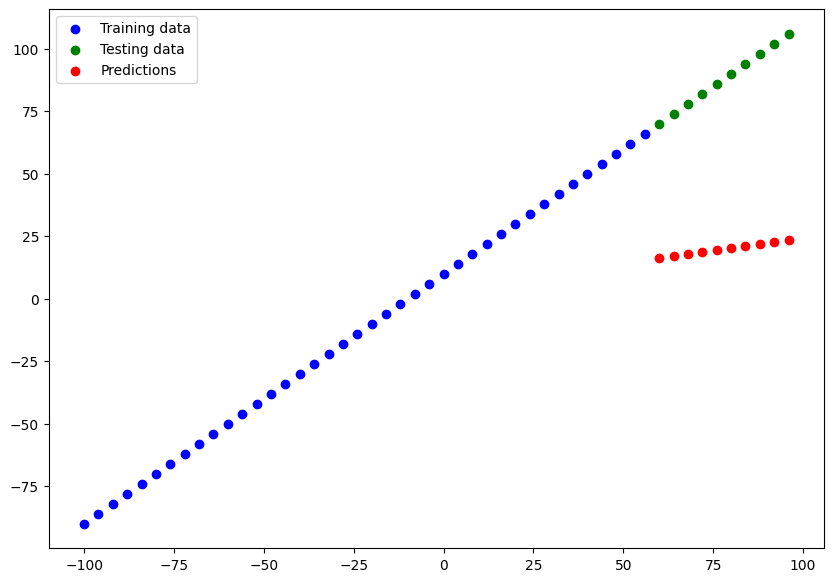

In [ ]:
# Make and plot predictions for model_1
y_preds_3 = model_3.predict(X_test)
plot_predictions(predictions=y_preds_3)

In [ ]:
# Calculate model_3 metrics
mae_3 = mae(y_test, y_preds_3).numpy()
mse_3 = mse(y_test, y_preds_3).numpy()
mae_3, mse_3

(68.159645, 4730.7)

In [ ]:

model_results = [["model_1", mae_1.numpy(), mse_1.numpy()],
                 ["model_2", mae_2, mse_2],
                 ["model_3", mae_3, mse_3]]

In [ ]:

import pandas as pd
all_results = pd.DataFrame(model_results, columns=["model", "mae", "mse"])
all_results

,model,mae,mse
0,model_1,21.291428,456.759613
1,model_2,10.695365,122.194984
2,model_3,68.159645,4730.700195


###Saving a model

In [ ]:
# Save a model using the SavedModel format
model_2.save('best_model_SavedModel_format')

In [ ]:

# Check it out - outputs a protobuf binary file (.pb) as well as other files
!ls best_model_SavedModel_format

In [ ]:

# Save a model using the HDF5 format
model_2.save("best_model_HDF5_format.h5") # note the addition of '.h5' on the end

In [ ]:

# Check it out
!ls best_model_HDF5_format.h5

###Loading a model

In [ ]:

# Load a model from the SavedModel format
loaded_saved_model = tf.keras.models.load_model("best_model_SavedModel_format")
loaded_saved_model.summary()

In [ ]:

# Compare model_2 with the SavedModel version (should return True)
model_2_preds = model_2.predict(X_test)
saved_model_preds = loaded_saved_model.predict(X_test)
mae(y_test, saved_model_preds.squeeze()).numpy() == mae(y_test, model_2_preds.squeeze()).numpy()

In [ ]:

# Load a model from the HDF5 format
loaded_h5_model = tf.keras.models.load_model("best_model_HDF5_format.h5")
loaded_h5_model.summary()

In [ ]:

# Compare model_2 with the loaded HDF5 version (should return True)
h5_model_preds = loaded_h5_model.predict(X_test)
mae(y_test, h5_model_preds.squeeze()).numpy() == mae(y_test, model_2_preds.squeeze()).numpy()

###Building a model for a real-life dataset

In [ ]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.boston_housing.load_data(
    path='boston_housing.npz', test_split=0.2, seed=113
)

In [ ]:
pd.DataFrame(X_train)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.23247,0.0,8.14,0.0,0.5380,6.142,91.7,3.9769,4.0,307.0,21.0,396.90,18.72
1,0.02177,82.5,2.03,0.0,0.4150,7.610,15.7,6.2700,2.0,348.0,14.7,395.38,3.11
2,4.89822,0.0,18.10,0.0,0.6310,4.970,100.0,1.3325,24.0,666.0,20.2,375.52,3.26
3,0.03961,0.0,5.19,0.0,0.5150,6.037,34.5,5.9853,5.0,224.0,20.2,396.90,8.01
4,3.69311,0.0,18.10,0.0,0.7130,6.376,88.4,2.5671,24.0,666.0,20.2,391.43,14.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,0.21977,0.0,6.91,0.0,0.4480,5.602,62.0,6.0877,3.0,233.0,17.9,396.90,16.20
400,0.16211,20.0,6.96,0.0,0.4640,6.240,16.3,4.4290,3.0,223.0,18.6,396.90,6.59
401,0.03466,35.0,6.06,0.0,0.4379,6.031,23.3,6.6407,1.0,304.0,16.9,362.25,7.83
402,2.14918,0.0,19.58,0.0,0.8710,5.709,98.5,1.6232,5.0,403.0,14.7,261.95,15.79


In [ ]:
(boston_pricing_dataset, target_price) = tf.keras.datasets.boston_housing.load_data(
    path='boston_housing.npz', test_split=0.2, seed=113
)
boston_pricing_dataset, target_price

((array([[1.23247e+00, 0.00000e+00, 8.14000e+00, ..., 2.10000e+01,
          3.96900e+02, 1.87200e+01],
         [2.17700e-02, 8.25000e+01, 2.03000e+00, ..., 1.47000e+01,
          3.95380e+02, 3.11000e+00],
         [4.89822e+00, 0.00000e+00, 1.81000e+01, ..., 2.02000e+01,
          3.75520e+02, 3.26000e+00],
         ...,
         [3.46600e-02, 3.50000e+01, 6.06000e+00, ..., 1.69000e+01,
          3.62250e+02, 7.83000e+00],
         [2.14918e+00, 0.00000e+00, 1.95800e+01, ..., 1.47000e+01,
          2.61950e+02, 1.57900e+01],
         [1.43900e-02, 6.00000e+01, 2.93000e+00, ..., 1.56000e+01,
          3.76700e+02, 4.38000e+00]]),
  array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1,
         17.9, 23.1, 19.9, 15.7,  8.8, 50. , 22.5, 24.1, 27.5, 10.9, 30.8,
         32.9, 24. , 18.5, 13.3, 22.9, 34.7, 16.6, 17.5, 22.3, 16.1, 14.9,
         23.1, 34.9, 25. , 13.9, 13.1, 20.4, 20. , 15.2, 24.7, 22.2, 16.7,
         12.7, 15.6, 18.4, 21. , 30.1, 15.1, 18.7,  9.6, 31.

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Replicate original model
model_4 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(50),
  tf.keras.layers.Dense(20),
  tf.keras.layers.Dense(1)
])

# Compile the model
model_4.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['mse'])

# Fit the model
model_4.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

Epoch 1/100
13/13 [==============================] - 48s 3ms/step - loss: 29.7151 - mse: 1874.5966
Epoch 2/100
13/13 [==============================] - 0s 4ms/step - loss: 21.0075 - mse: 545.0237
Epoch 3/100
13/13 [==============================] - 0s 3ms/step - loss: 19.5025 - mse: 477.1669
Epoch 4/100
13/13 [==============================] - 0s 3ms/step - loss: 19.0781 - mse: 462.8114
Epoch 5/100
13/13 [==============================] - 0s 3ms/step - loss: 18.7787 - mse: 450.1667
Epoch 6/100
13/13 [==============================] - 0s 4ms/step - loss: 18.3192 - mse: 433.7354
Epoch 7/100
13/13 [==============================] - 0s 4ms/step - loss: 18.0929 - mse: 424.6685
Epoch 8/100
13/13 [==============================] - 0s 3ms/step - loss: 17.7021 - mse: 408.2220
Epoch 9/100
13/13 [==============================] - 0s 3ms/step - loss: 17.2949 - mse: 393.5642
Epoch 10/100
13/13 [==============================] - 0s 3ms/step - loss: 16.7338 - mse: 373.8414
Epoch 11/100
13/13 [=======

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Replicate original model
model_5 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(50),
  tf.keras.layers.Dense(20),
  tf.keras.layers.Dense(1)
])

# Compile the model
model_5.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=['mse'])

# Fit the model
model_5.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

Epoch 1/100
13/13 [==============================] - 1s 4ms/step - loss: 41.1940 - mse: 8042.0615
Epoch 2/100
13/13 [==============================] - 0s 3ms/step - loss: 20.9400 - mse: 565.1982
Epoch 3/100
13/13 [==============================] - 0s 4ms/step - loss: 18.2069 - mse: 427.5435
Epoch 4/100
13/13 [==============================] - 0s 3ms/step - loss: 16.8799 - mse: 378.5967
Epoch 5/100
13/13 [==============================] - 0s 3ms/step - loss: 13.8030 - mse: 277.4725
Epoch 6/100
13/13 [==============================] - 0s 3ms/step - loss: 11.6372 - mse: 442.8722
Epoch 7/100
13/13 [==============================] - 0s 3ms/step - loss: 16.2497 - mse: 736.4838
Epoch 8/100
13/13 [==============================] - 0s 3ms/step - loss: 11.1048 - mse: 202.6684
Epoch 9/100
13/13 [==============================] - 0s 3ms/step - loss: 7.5467 - mse: 105.6560
Epoch 10/100
13/13 [==============================] - 0s 3ms/step - loss: 6.8084 - mse: 96.9833
Epoch 11/100
13/13 [===========

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Replicate original model
model_6 = tf.keras.Sequential([
  tf.keras.layers.Dense(20),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# Compile the model
model_6.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=['mse'])

# Fit the model
model_6.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

Epoch 1/100
13/13 [==============================] - 1s 3ms/step - loss: 31.2900 - mse: 2550.0271
Epoch 2/100
13/13 [==============================] - 0s 2ms/step - loss: 20.4761 - mse: 522.6051
Epoch 3/100
13/13 [==============================] - 0s 2ms/step - loss: 18.7304 - mse: 448.1548
Epoch 4/100
13/13 [==============================] - 0s 2ms/step - loss: 17.9407 - mse: 416.8832
Epoch 5/100
13/13 [==============================] - 0s 2ms/step - loss: 16.9788 - mse: 381.9102
Epoch 6/100
13/13 [==============================] - 0s 2ms/step - loss: 15.6098 - mse: 334.4662
Epoch 7/100
13/13 [==============================] - 0s 3ms/step - loss: 12.9911 - mse: 250.6898
Epoch 8/100
13/13 [==============================] - 0s 2ms/step - loss: 8.9520 - mse: 145.2164
Epoch 9/100
13/13 [==============================] - 0s 3ms/step - loss: 8.5245 - mse: 159.5757
Epoch 10/100
13/13 [==============================] - 0s 2ms/step - loss: 6.8587 - mse: 96.1258
Epoch 11/100
13/13 [============

saving the different models to check the size

In [ ]:
model_4.save('model_4')
model_5.save('model_5')
model_6.save('model_6')

In [ ]:

# Check the results of the insurance model
model_4.evaluate(X_test, y_test)

4/4 [==============================] - 0s 4ms/step - loss: 6.6523 - mse: 88.1991


[6.652305603027344, 88.19913482666016]

In [ ]:

# Check the results of the insurance model
model_5.evaluate(X_test, y_test)

4/4 [==============================] - 0s 6ms/step - loss: 6.8410 - mse: 92.0156


[6.841033458709717, 92.01561737060547]

In [ ]:

# Check the results of the insurance model
model_6.evaluate(X_test, y_test)

4/4 [==============================] - 0s 5ms/step - loss: 7.1342 - mse: 98.3980


[7.134218692779541, 98.39802551269531]

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
